# パッケージのインポート


In [1]:
import matplotlib.pylab as plt
import numpy as np
import numpy.typing as npt

# Deep Learning From Scratch

https://github.com/oreilly-japan/deep-learning-from-scratch


# Chapter2 　パーセプトロンの実装


In [2]:
def AND(x1: int, x2: int):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    return 1 if tmp > 0 else 0


assert AND(0, 0) == 0
assert AND(0, 1) == 0
assert AND(1, 0) == 0
assert AND(1, 1) == 1

In [3]:
def NAND(x1: int, x2: int):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(x * w) + b
    return 1 if tmp > 0 else 0


assert NAND(0, 0) == 1
assert NAND(0, 1) == 1
assert NAND(1, 0) == 1
assert NAND(1, 1) == 0

In [4]:
def OR(x1: int, x2: int):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(x * w) + b
    return 1 if tmp > 0 else 0


assert OR(0, 0) == 0
assert OR(0, 1) == 1
assert OR(1, 0) == 1
assert OR(1, 1) == 1

In [5]:
def XOR(x1: int, x2: int):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y


assert XOR(0, 0) == 0
assert XOR(0, 1) == 1
assert XOR(1, 0) == 1
assert XOR(1, 1) == 0

# Chapter3 ニューラルネットワーク


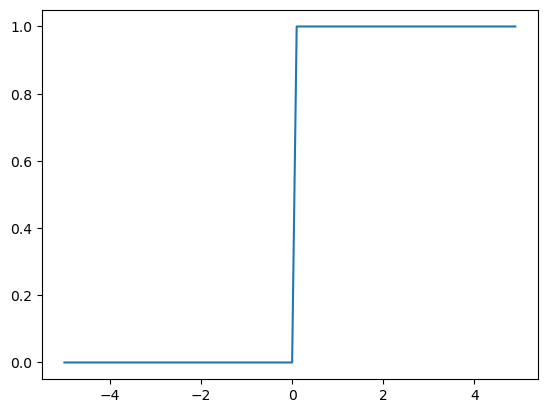

In [6]:
def step_function(x: npt.NDArray):
    return np.array(x > 0, dtype=np.int_)


x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.show()

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
def relu(x: int):
    return np.maximum(0, x)

## 多次元配列、行列


In [9]:
A = np.array([1, 2, 3, 4])
print(A)

[1 2 3 4]


In [10]:
np.ndim(A)

1

In [11]:
A.shape

(4,)

In [12]:
A.shape[0]

4

In [13]:
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [14]:
print("dim:", np.ndim(B))
print("Shape:", B.shape)

dim: 2
Shape: (3, 2)


In [15]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print("AとBの積:", np.dot(A, B))

AとBの積: [[19 22]
 [43 50]]


In [16]:
A = np.array([[1, 2], [3, 4], [5, 6]])
# １次元の配列を渡すと[[7],[8]]みたいなイメージかな
B = np.array([7, 8])

np.dot(A, B)

array([23, 53, 83])

ニューラルネットワークの計算を行列で行う


In [17]:
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print("y1:{} y2:{} y3{}".format(*Y))

y1:5 y2:11 y317


各層における信号伝達の実装


In [18]:
# 0→1層の実装
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
# 活性化関数としてシグモイド関数を使用。
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [19]:
# 1→2層の実装
W2 = np.array(
    [[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]
)  # 1→2層にかけて出力するニューロンの数が2個なのはここで定義しているW2の列が2つ？
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2  # 1層目からの出力をを入力としている点が先ほどと異なる
Z2 = sigmoid(A2)
print("A2", A2)
print("Z2", Z2)

A2 [0.51615984 1.21402696]
Z2 [0.62624937 0.7710107 ]


In [20]:
# 出力層への実装
def identity_function(x):
    return x


W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)  # 活性化関数に恒等関数を使用。出力層ではシグモイド関数は使わない。

## 出力層の設計


In [21]:
def softmax(a: np.ndarray):
    c = np.max(a)  # オーバーフロー対策
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y


a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


## 手書き数字認識

MNIST を使用した分類

- MNIST の画像は 28px x 28px の画像
- それぞれの数字の画像には「１」「２」「３」のようにラベルが割り当てられている

### load_mnist について

引数 flatten を False にすると 1 _ 28 _ 28 の３次元配列として画像を扱う

True にすると要素数が 784(28 \* 28)個ある１次元配列として画像を扱う

訓練画像は 60000 枚、テスト画像が 10000 枚がある。出力結果にこれらの数字が出てくるが画像の枚数のことを意味していると思われる。

### one hot 表現について

https://mathwords.net/onehot

ベクトルで表現する。変数のすべての値を平等に扱える。


In [22]:
# MNISTの読み込みなどは時間がかかるかもしれないので使いたい時だけ以下の変数をTrueに設定する
USE_MNIST = False

In [23]:
import sys, os
from dataset.mnist import load_mnist
from PIL import Image
import pickle

if USE_MNIST:
    sys.path.append(os.pardir)
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

    print("--------------------")
    print("x_train.shape", x_train.shape)  # 訓練画像
    print("t_train.shape", t_train.shape)  # 訓練ラベル
    print("x_test.shape", x_test.shape)  # テスト画像
    print("t_train.shape", x_test.shape)  # テストラベル
    print("--------------------")

    def img_show(img):
        pil_img = Image.fromarray(np.uint8(img))
        pil_img.show()

    img = x_train[0]
    label = t_train[0]
    print(label)  # 「５」

    print(img.shape)

    img = img.reshape(28, 28)  # 28px x 28pxに変形
    print(img.shape)
    img_show(img)

↓ MNIST を使用して推測する。


In [24]:
if USE_MNIST:

    def get_data():
        (x_train, t_train), (x_test, t_test) = load_mnist(
            normalize=True, flatten=True, one_hot_label=False
        )
        return x_test, t_test

    def init_network():
        with open("sample_weight.pkl", "rb") as f:
            network = pickle.load(f)
        return network

    def predict(network, x: np.ndarray):
        W1, W2, W3 = network["W1"], network["W2"], network["W3"]
        b1, b2, b3 = network["b1"], network["b2"], network["b3"]
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        # print(z1.shape)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        # print(z2.shape)
        a3 = np.dot(z2, W3) + b3
        # print(a3.shape)
        y = softmax(a3)
        return y

    x, t = get_data()
    network = init_network()
    accuracy_cnt = 0

    for i in range(len(x)):
        y = predict(network, x[i])
        p = np.argmax(y)
        if p == t[i]:
            accuracy_cnt += 1
    print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

### バッチ処理


In [25]:
if USE_MNIST:
    x, t = get_data()
    network = init_network()
    batch_size = 100  # バッチの数
    accuracy_cnt = 0

    for i in range(0, len(x), batch_size):
        x_batch = x[i : i + batch_size]
        y_batch = predict(network, x_batch)
        p = np.argmax(y_batch, axis=1)
        accuracy_cnt += np.sum(p == t[i : i + batch_size])
    print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

# 第４章　ニューラルネットワークの学習


## ２乗和誤差

損失関数として用いられる２乗和誤差


In [26]:
def sum_squared_error(y: np.ndarray, t: np.ndarray):
    return 0.5 * np.sum((y - t) ** 2)

例 1。2 の出力が最も高い例


In [27]:
# one-hot表現。この場合は「2」を正解とする。
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# ニューラルネットワークの出力と仮定。「2」の出力がもっとも高い
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))

0.09750000000000003

例 2。 7 の出力が最も高いの例


In [28]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squared_error(np.array(y), np.array(t))

0.5975

つまり、例 1 の方が損失関数の値が小さい → より適した結果と言える。


## 交差エントロピー誤差


In [29]:
def cross_entropy_error(y, t):
    delta = 1e-7  # np.log(0)となってマイナス無限大になるのを阻止
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + delta)) / batch_size

In [30]:
t = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
y = np.array([0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0])
cross_entropy_error(y, t)

0.510825457099338

In [31]:
y = np.array([0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0])
cross_entropy_error(y, t)

2.302584092994546

In [32]:
y = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
batch_size = 3
t = np.array([0, 2, 1])
print(y[np.arange(batch_size), t])

[0 5 7]


## 4.3.2 数値微分


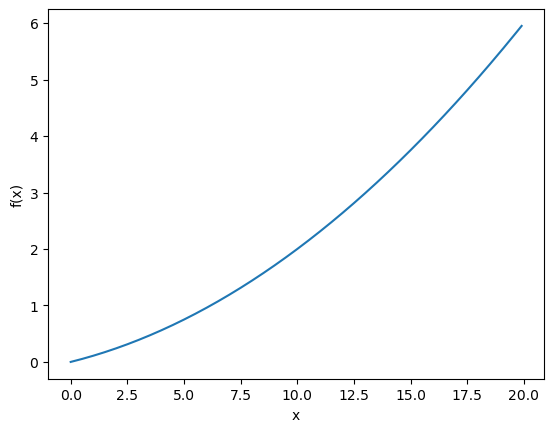

In [33]:
def function_1(x: int):
    return 0.01 * x**2 + 0.1 * x


x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

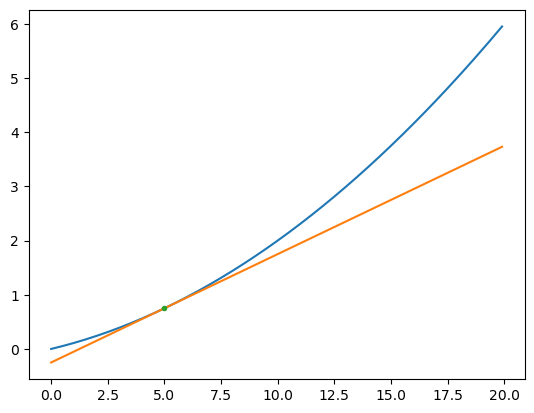

In [34]:
def numerical_diff(f, x):
    h = 1e-4  # 0.0001
    return (f(x + h) - f(x - h)) / (2 * h)


def tangent_line(f, x):
    d = numerical_diff(f, x)
    y = f(x) - d * x
    return lambda t: d * t + y


tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(5, function_1(5), marker=".")
plt.show()

In [35]:
numerical_diff(function_1, 5)

0.1999999999990898

## 4.3.3 偏微分


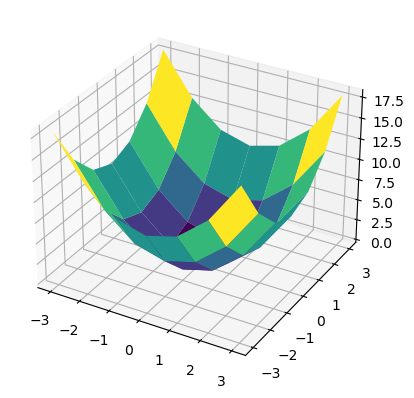

In [36]:
from mpl_toolkits.mplot3d import Axes3D


def function_2(x: np.ndarray[int]):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def createData(x0Array: np.ndarray[int], x1Array: np.ndarray[int]):
    x = []
    y = []
    z = []
    for i, x1 in enumerate(x0Array):
        for j, x0 in enumerate(x1Array):
            x.append(x1)
            y.append(x0)
            z.append(function_2(np.array([x1, x0])))
    return (
        np.array(x).reshape(len(x1Array), len(x0Array)),
        np.array(y).reshape(len(x1Array), len(x0Array)),
        np.array(z).reshape(len(x1Array), len(x0Array)),
    )


x0 = np.arange(-3, 4, 1)
x1 = np.arange(-3, 4, 1)
x, y, z = createData(x0, x1)
fig = plt.figure()

ax = fig.add_subplot(projection="3d")

ax.plot_surface(x, y, z, cmap="viridis")

勾配とは全ての変数の偏微分をベクトルとしてまとめたもののこと。

numercai_gradient はそれを計算している。


In [37]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)  # 要素2個の配列（偏微分の結果）

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val
    return grad


def numerical_gradient_batch(f, X):
    if X.ndim == 1:
        return numerical_gradient(f, X)
    else:
        grad = np.zeros_like(X)
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient(f, x)
        return grad

In [38]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))
print(numerical_gradient(function_2, np.array([0.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]
[0. 0.]


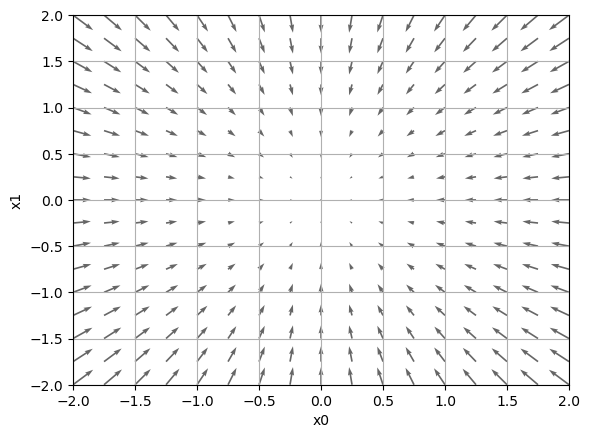

In [39]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)
X = X.flatten()
Y = Y.flatten()
grad = numerical_gradient_batch(function_2, np.array([X, Y]).T).T
plt.figure()
plt.quiver(
    X, Y, -grad[0], -grad[1], angles="xy", color="#666666"
)  # quiverはベクトルを描画する。X,Yはベクトルの開始点のarray。-grad[0] -grad[1]はベクトルの成分のarray。
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()
plt.draw()
plt.show()

## 4.4.1 勾配法

勾配降下法の実装。


In [40]:
from typing import Callable
from numpy import ndarray


def gradient_descent(
    f: Callable[[ndarray], object], init_x: ndarray[float], lr=0.01, step_num=100
):
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [41]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

init_x = np.array([2.0, 2.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))

[-6.11110793e-10  8.14814391e-10]
[4.07407195e-10 4.07407195e-10]


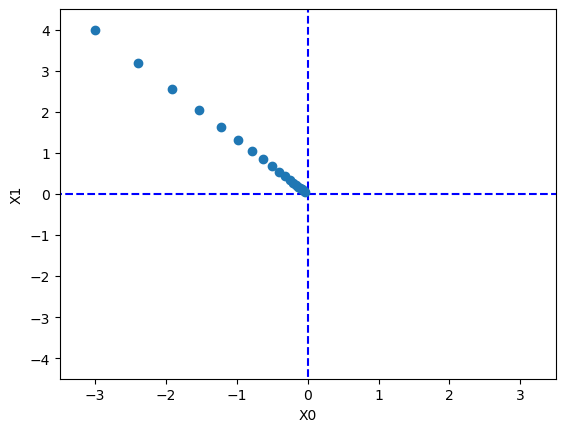

In [42]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent_with_history(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent_with_history(
    function_2, init_x, lr=lr, step_num=step_num
)

plt.plot([-5, 5], [0, 0], "--b")
plt.plot([0, 0], [-5, 5], "--b")
plt.plot(x_history[:, 0], x_history[:, 1], "o")
plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

[[-3.          4.        ]
 [-2.9994      3.9992    ]
 [-2.99880012  3.99840016]
 [-2.99820036  3.99760048]
 [-2.99760072  3.99680096]
 [-2.9970012   3.9960016 ]
 [-2.9964018   3.9952024 ]
 [-2.99580252  3.99440336]
 [-2.99520336  3.99360448]
 [-2.99460432  3.99280576]
 [-2.9940054   3.9920072 ]
 [-2.9934066   3.99120879]
 [-2.99280791  3.99041055]
 [-2.99220935  3.98961247]
 [-2.99161091  3.98881455]
 [-2.99101259  3.98801679]
 [-2.99041439  3.98721918]
 [-2.9898163   3.98642174]
 [-2.98921834  3.98562445]
 [-2.9886205   3.98482733]
 [-2.98802277  3.98403036]
 [-2.98742517  3.98323356]
 [-2.98682768  3.98243691]
 [-2.98623032  3.98164042]
 [-2.98563307  3.9808441 ]
 [-2.98503594  3.98004793]
 [-2.98443894  3.97925192]
 [-2.98384205  3.97845607]
 [-2.98324528  3.97766038]
 [-2.98264863  3.97686484]
 [-2.9820521   3.97606947]
 [-2.98145569  3.97527426]
 [-2.9808594   3.9744792 ]
 [-2.98026323  3.97368431]
 [-2.97966718  3.97288957]
 [-2.97907124  3.97209499]
 [-2.97847543  3.97130057]
 

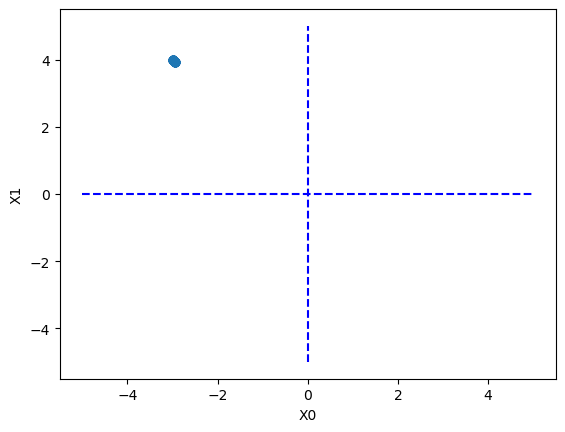

In [43]:
init_x = np.array([-3.0, 4.0])
# 大きすぎ
# lr = 10
# # 小さすぎ
lr = 1e-4
x, x_history = gradient_descent_with_history(
    function_2, init_x=init_x, lr=lr, step_num=100
)

print(x_history)
plt.plot([-5, 5], [0, 0], "--b")
plt.plot([0, 0], [-5, 5], "--b")
plt.plot(x_history[:, 0], x_history[:, 1], "o")

plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

## 4.4.2 　ニューラルネットワークの勾配

ニューラルネットワークにおける勾配とは、重みパラメータに関する損失関数の勾配。


In [44]:
import sys, os

sys.path.append((os.pardir))

import numpy as np


class SimpleNet:
    def __init__(self) -> None:
        self.W = np.random.randn(2, 3)

    def predict(self, x: float):
        return np.dot(x, self.W)

    def loss(self, x: float, t: float):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [45]:
net = SimpleNet()
# print(net.W)

x = np.array([0.6, 0.9])
p = net.predict(x)
print("predict", p)

print("最大値のインデックス", np.argmax(p))

# 正解ラベル
t = np.array([0, 0, 1])
print("loss:", net.loss(x, t))

predict [-0.78179942 -0.30133697 -0.33733077]
最大値のインデックス 1
loss: 0.9850006309103028


勾配を求める


In [46]:
def f(W: ndarray):
    return net.loss(x, t)


# サンプルより抜粋
# 多次元行列に対応したバージョンと思われる。
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=["multi_index"], op_flags=["readwrite"])
    while not it.finished:
        idx = it.multi_index
        print(idx)
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2 * h)

        x[idx] = tmp_val  # 値を元に戻す
        it.iternext()

    return grad


dW = numerical_gradient(f, net.W)
print("", dW)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
 [[ 0.1436615   0.23227506 -0.37593656]
 [ 0.21549225  0.3484126  -0.56390485]]


4.5 学習アルゴリズムの実装へ入る

## 4.5.1 　 2 層ニューララルネットワークのクラス


In [87]:
import sys, os

sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        """
        input_size: int
        入力層のニューロンの数

        hidden_size: int
        隠れ層のニューロンの数

        output_size: int
        出力層のニューロンの数
        """
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        """
        認識（推論）を行う

        x 画像データ
        """
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y

    def loss(self, x, t):
        """
        損失関数の値を求める。

        x:画像データ

        t:正解ラベル(one-hot表現)
        """
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        """
        認識精度を求める
        """
        y = self.predict(x)
        # axis=1を指定すると行に沿った方向（ネットワークの出力のうち一つの画像に相当するもの。画像がどの文字を表しているかの確率の配列）
        # どのインデックスの値が一番大きいかを調べることで、推測値を求めることができる
        y = np.argmax(y, axis=1)
        # 訓練データはone-hot表現なので値が1のインデックスの配列になる。
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """
        重みパラメータに対する勾配を求める。
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
        grads["b1"] = numerical_gradient(loss_W, self.params["b1"])
        grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
        grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
        return grads

    def gradient(self, x, t):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads["W2"] = np.dot(z1.T, dy)
        grads["b2"] = np.sum(dy, axis=0)

        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads["W1"] = np.dot(x.T, da1)
        grads["b1"] = np.sum(da1, axis=0)

        return grads


net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
x = np.random.rand(100, 784)
y = net.predict(x)
y.shape

(100, 10)

In [82]:
# argmaxの挙動の例
array = np.array([[1, 9, 3], [4, 5, 6]])
np.argmax(array, axis=1)

array([1, 2])

TwoLayerNet の`numberical_gradient`の `x` には重みを与えている。

具体的には以下のコードで計算されている。

```python

# 今回、xは2次元のndarray
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        # idxは(0,0)みたいにインデックスを表すタプル。
        idx = it.multi_index
        tmp_val = x[idx]
				# 元々の重み(x[idx])にhを足したもの。idxの位置の重みを更新。そしてそれを入力として与えて計算。
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)

				# 元々の重みにhを引いたもの。idxの位置の重みを更新。そしてそれを入力として与えて計算。
        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)


        x[idx] = tmp_val # 値を元に戻す
        it.iternext()

    return grad
```


grads 変数には params 変数と対応するように各パラメータの勾配


In [56]:
x = np.random.rand(100, 784)
t = np.random.rand(100, 10)
grads = net.numerical_gradient(x, t)

print("grads['W1'].shape", grads["W1"].shape)
print("grads['b1'].shape", grads["b1"].shape)
print("grads['W2'].shape", grads["W2"].shape)
print("grads['b2'].shape", grads["b2"].shape)

## 4.5.2 ミニバッチ学習の実装

TwoLayerNet にミニバッチ学習を実装していきます。


train acc, test acc | 0.10218333333333333, 0.101
train acc, test acc | 0.78565, 0.7942
train acc, test acc | 0.8788166666666667, 0.8829
train acc, test acc | 0.89885, 0.9026
train acc, test acc | 0.90775, 0.9123
train acc, test acc | 0.9133666666666667, 0.9165
train acc, test acc | 0.9191833333333334, 0.9217
train acc, test acc | 0.9233166666666667, 0.9248
train acc, test acc | 0.9266666666666666, 0.927
train acc, test acc | 0.9305, 0.9308
train acc, test acc | 0.93375, 0.9339
train acc, test acc | 0.9369666666666666, 0.9368
train acc, test acc | 0.9392, 0.9384
train acc, test acc | 0.94175, 0.9403
train acc, test acc | 0.94365, 0.942
train acc, test acc | 0.9456666666666667, 0.9436
train acc, test acc | 0.94695, 0.945


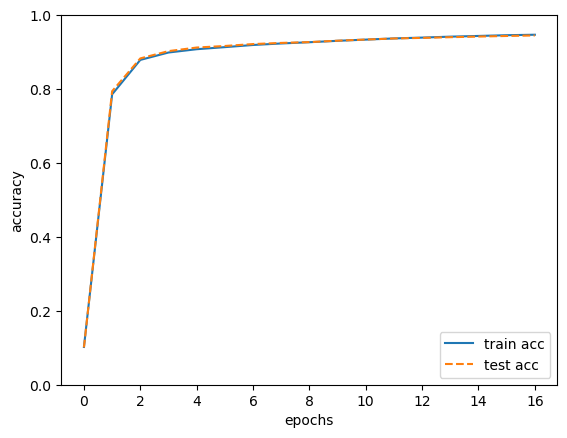

In [92]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
train_loss_list = []
# ハイパーパラメータ
iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_acc_list = []
test_acc_list = []
# 1エポックあたりの繰り返し数
iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    # ミニバッチの取得
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]  # ファンシーインデックス
    t_batch = t_train[batch_mask]

    # grad = network.numerical_gradient(x_batch, t_batch)
    # 高速版
    grad = network.gradient(x_batch, t_batch)

    # パラメータの更新
    for key in ("W1", "b1", "W2", "b2"):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append((loss))
    # 1エポックごとに認識精度を計算
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {"train": "o", "test": "s"}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label="train acc")
plt.plot(x, test_acc_list, label="test acc", linestyle="--")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()

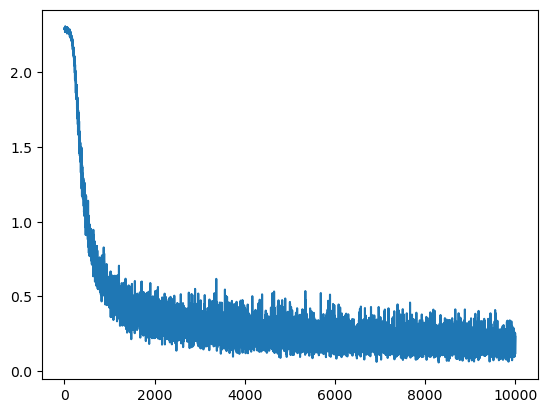

In [71]:
plt.plot(np.arange(len(train_loss_list)), train_loss_list)